<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Полезные-ссылки:" data-toc-modified-id="Полезные-ссылки:-0.0.1"><span class="toc-item-num">0.0.1&nbsp;&nbsp;</span><font color="orange">Полезные ссылки:</font></a></span></li></ul></li><li><span><a href="#Общее-впечатление" data-toc-modified-id="Общее-впечатление-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span><font color="orange">Общее впечатление</font></a></span></li><li><span><a href="#Общее-впечатление-(ревью-2)" data-toc-modified-id="Общее-впечатление-(ревью-2)-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span><font color="orange">Общее впечатление (ревью 2)</font></a></span></li></ul></li><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Linear Regression</a></span></li><li><span><a href="#CatBoostRegressor" data-toc-modified-id="CatBoostRegressor-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>CatBoostRegressor</a></span></li><li><span><a href="#LGBMRegressor" data-toc-modified-id="LGBMRegressor-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>LGBMRegressor</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

In [172]:

import pandas as pd
import pathlib
from pathlib import Path
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.metrics import mean_squared_error, make_scorer
from catboost import CatBoostRegressor
import catboost as cat
from lightgbm import LGBMRegressor
warnings.filterwarnings('ignore')

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что все импорты собраны в первой ячейке ноутбука! Если у того, кто будет запускать твой ноутбук будут отсутствовать некоторые библиотеки, то он это увидит сразу, а не в процессе!
</div>

In [173]:
data = pd.read_csv('/datasets/taxi.csv',index_col=[0], parse_dates=[0]) 


In [174]:
data

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32
...,...
2018-08-31 23:10:00,32
2018-08-31 23:20:00,24
2018-08-31 23:30:00,27


In [175]:
data.sort_index(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


In [176]:
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


In [177]:
data.describe()

,num_orders
count,26496.000000
mean,14.070463
std,9.211330
min,0.000000
25%,8.000000
50%,13.000000
75%,19.000000
max,119.000000


In [178]:
data.index.is_monotonic


True

In [179]:
print('Минимальная:',data.index.min())
print('Максимальная:',data.index.max())
print('Общее:',data.index.max() - data.index.min())

Минимальная: 2018-03-01 00:00:00
Максимальная: 2018-08-31 23:50:00
Общее: 183 days 23:50:00


### Вывод

 
В датасете даны заказы такси с интервалом 10 минут с 2018-03-01 00:00:00 по 2018-08-31 23:50:00.
Данные собраны за 183 дня и 23 часа. Минимальное количество заказов за 1 час: 0, а максимальное: 462.
Пропусков нет.
Всего один признак:  datetime — дата и время заказа такси и num_orders — количество заказов такси (целевой признак).


## Анализ

In [180]:
#сделаю ресемплирование с суммой заказов на каждый час по часам и построю график

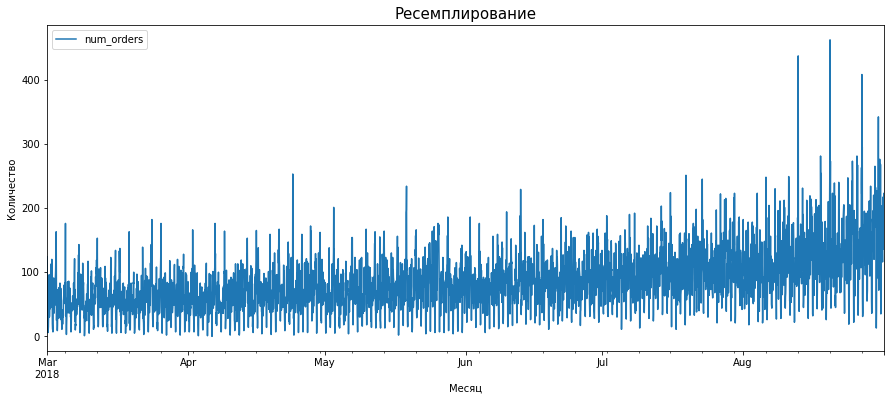

In [181]:
data = data.resample('1H').sum()
figsize = (15, 6)
data.plot(figsize=figsize)
plt.title('Ресемплирование', fontsize = 15)
plt.xlabel('Месяц', fontsize = 10)
plt.ylabel('Количество', fontsize = 10)

plt.show()


<div class="alert alert-block alert-success">
<b>Успех:</b> Данные загружены корректно, первичный осмотр проведен. Ресемплинг был сделан верно.
</div>

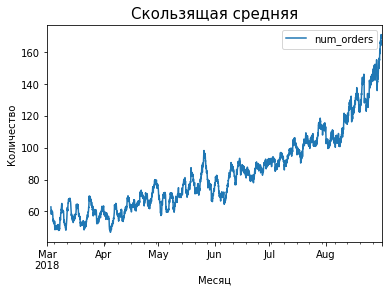

In [182]:
#скользящая средняя
data.rolling(50).mean().plot()
plt.title('Cкользящая средняя', fontsize = 15)
plt.xlabel('Месяц', fontsize = 10)
plt.ylabel('Количество', fontsize = 10)

plt.show()

In [183]:
#Разложу временной ряд на тренд, сезонность 

In [184]:
decomposed = seasonal_decompose(data)

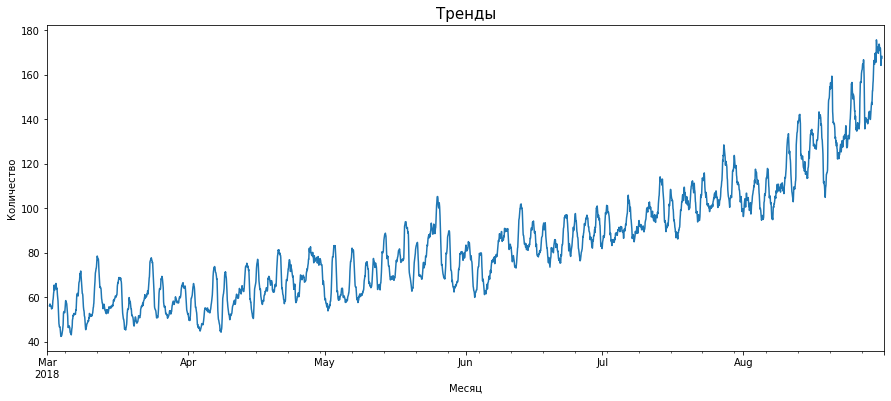

In [185]:
decomposed.trend.plot(figsize=figsize)
plt.title('Тренды', fontsize = 15)
plt.xlabel('Месяц', fontsize = 10)
plt.ylabel('Количество', fontsize = 10)

plt.show()


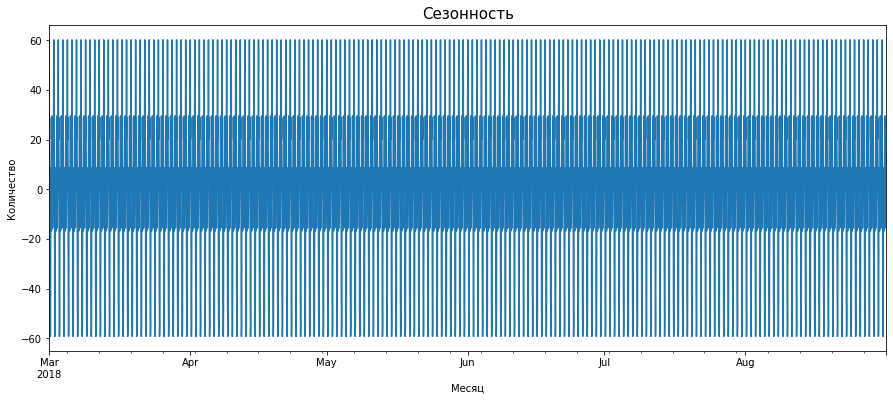

In [186]:
decomposed.seasonal.plot(figsize=figsize)
plt.title('Сезонность', fontsize = 15)
plt.xlabel('Месяц', fontsize = 10)
plt.ylabel('Количество', fontsize = 10)

plt.show()

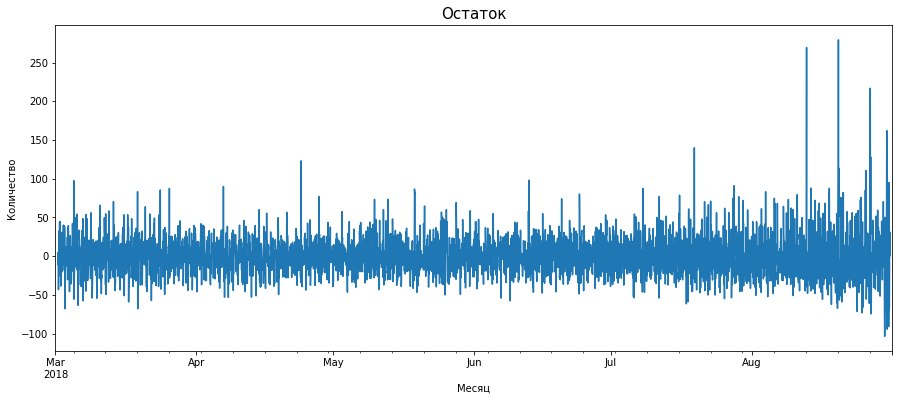

In [187]:
decomposed.resid.plot(figsize=figsize)
plt.title('Остаток', fontsize = 15)
plt.xlabel('Месяц', fontsize = 10)
plt.ylabel('Количество', fontsize = 10)

plt.show()

In [188]:
#подробнее рассмотрим
decomposedWeek = seasonal_decompose(data['2018-04-01':'2018-04-08'])
decomposedDays = seasonal_decompose(data['2018-04-04':'2018-04-06'])

decomposedMonth_march = seasonal_decompose(data['2018-03-01':'2018-04-01'])
decomposedMonth_august = seasonal_decompose(data['2018-07-31':'2018-08-31'])

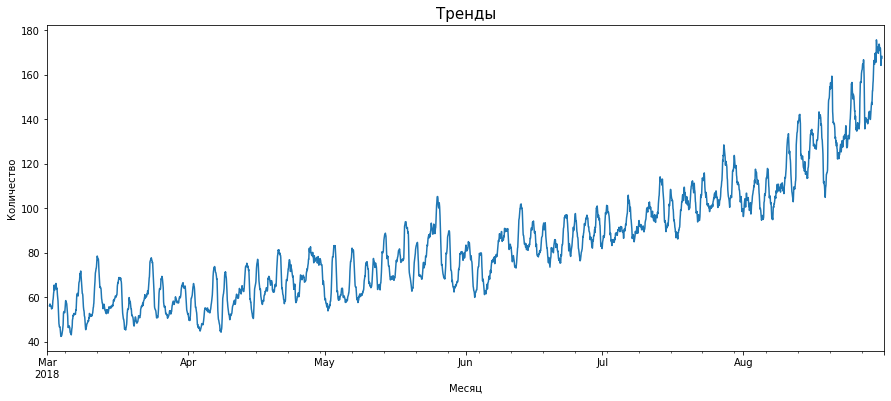

In [189]:
figsize = (15, 6)
decomposed.trend.plot(figsize=figsize)
plt.title('Тренды', fontsize = 15)
plt.xlabel('Месяц', fontsize = 10)
plt.ylabel('Количество', fontsize = 10)

plt.show()


В летний период количество заказов растет

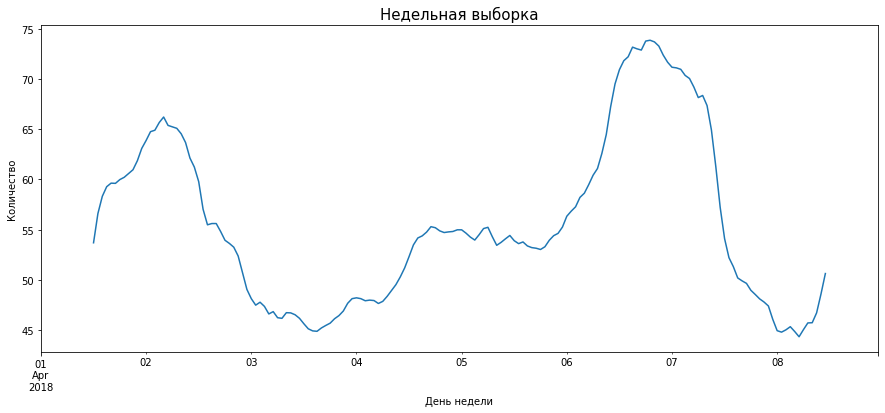

In [190]:

decomposedWeek.trend.plot(figsize=figsize)
plt.title('Недельная выборка', fontsize = 15)
plt.xlabel('День недели', fontsize = 10)
plt.ylabel('Количество', fontsize = 10)

plt.show()


Для примера рассматриваю начало недели 2 апреля 2018 года (понедельник) и 8 апреля 2018 года как конец недели (воскресенье). Можно отметить тенденцию слабого спроса в такие дни как : вторник и воскресенье . Больше всего спроса приходится на понедельник и субботу.

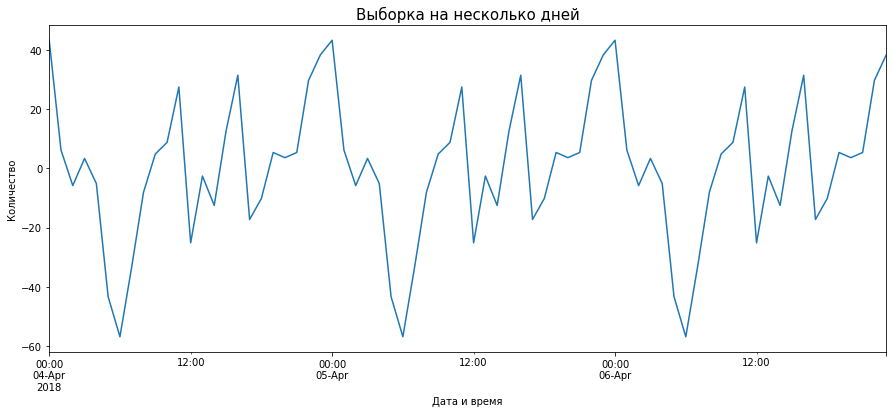

In [191]:
decomposedDays.seasonal.plot(figsize=figsize)
plt.title('Выборка на несколько дней', fontsize = 15)
plt.xlabel('Дата и время', fontsize = 10)
plt.ylabel('Количество', fontsize = 10)

plt.show()

С утра самые плохие показатели заказов такси, ситуация начинает улучшаться только  ближе к 12 и приходит в примерно стандартное положение с относительными колебаниями. А ближе к полуночи случается резкий скачок - самые высокие показатели

<div class="alert alert-block alert-success">
<b>Успех:</b> Декомпозиция была сделана верно. Хорошо, что сезонность была визуализирована на более коротком интервале!
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Во всех графиках в проекте нужно подписать оси и названия, чтобы было понятно, что на нем визуализировано.
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения  - подписала графики)
</div>

<div class="alert alert-block alert-success">
<b>Успех (ревью 2):</b> ОК.
</div>

## Обучение

Обучу три модели. В качестве моделей использую Линейную регрессию, LGBMRegressor и CatBoostRegressor.

In [192]:
#функция для создания признаков

In [193]:
max_lag = 24
rolling_mean_size = 50
def make_features(data, column, max_lag, rolling_mean_size):
    
    data['dayofweek'] = data.index.dayofweek
    data['hour'] = data.index.hour
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data[column].shift(lag)

    data['rolling_mean'] = data[column].shift().rolling(rolling_mean_size).mean()

In [194]:
data_copy = data.copy()

make_features(data,'num_orders', max_lag, rolling_mean_size)

In [195]:
#def make_features(data, max_lag, rolling_mean_size):
 #   data['dayofweek'] = data.index.dayofweek
  #  data['hour'] = data.index.hour
    
   # for lag in range(1, max_lag + 1):
    #    data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    #data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()
    #data = data.dropna()

<div class="alert alert-block alert-info">

<b>Совет: </b> Желательно было написать функцию таким образом, чтобы она возвращала новый датафрейм, а не изменяла глобальную переменную.
1. Это хорошая практика (не изменять глобальные переменные внутри функции), которая улучшает читаемость кода.
2. В какой-то момент может появиться необходимость подбирать некоторые параметры используемый внутри функции. В этот момент копирование датасета станет обязательным.
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения - переделала функцию,если я все правильно поняла
</div>

<div class="alert alert-block alert-info">
<b>Совет (ревью 2): </b> Копирование лучше было бы занести внутрь функции.
</div>

In [196]:
#Применю функцию с лагом до 24 часов и 50 скользящим средним

In [197]:
#make_features(data, 24, 50)

In [198]:
data = data.dropna()


In [199]:
#признаки и выборки
train, test = train_test_split(data, shuffle=False, test_size=0.1)

features_train = train.drop(['num_orders'], axis=1)
target_train = train['num_orders']
features_test = test.drop(['num_orders'], axis=1)
target_test = test['num_orders']

In [200]:
#features_train

In [201]:
#target_train

In [202]:
print(features_train.shape)
print(features_test.shape)
print(target_train.shape)
print(target_test.shape)

(3929, 27)
(437, 27)
(3929,)
(437,)


<div class="alert alert-block alert-success">
<b>Успех:</b> Разбиение было сделано корректно.
</div>

### Linear Regression

In [203]:
model = LinearRegression()
model.fit(features_train, target_train)
target_predict = model.predict(features_train)
rmse_lr = mean_squared_error(target_train, target_predict) ** 0.5
rmse_lr


25.834533375003296

### CatBoostRegressor

In [204]:
model_Cat = CatBoostRegressor( random_state = 42)
hyperparams = [{'depth' : [5],
                'learning_rate' : [0.1],
                'iterations' : [300],
                'verbose' : [False]
               }]
my_cv=TimeSeriesSplit(n_splits=3).split(features_train)
cbr = GridSearchCV(model_Cat, hyperparams, cv=my_cv, scoring='neg_mean_squared_error')
cbr.fit(features_train, target_train)

print((cbr.best_score_*-1)**0.5)

26.398187279721594


In [205]:
best_params_CBR = cbr.best_params_
print(best_params_CBR)

{'depth': 5, 'iterations': 300, 'learning_rate': 0.1, 'verbose': False}


<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что для подбора параметров использовался метод основанный на кросс-валидации с подходящим под данные сплиттером.
</div>

### LGBMRegressor

In [206]:
LGBMR = LGBMRegressor() 
hyperparams = [{'depth' : [5],
                'learning_rate':[0.03],
                'verbose' : [10],
                'random_state':[42]}]

my_cv=TimeSeriesSplit(n_splits=3).split(features_train)
lgbmr = GridSearchCV(model_Cat, hyperparams, cv=my_cv, scoring='neg_mean_squared_error')
lgbmr.fit(features_train, target_train)

0:	learn: 28.7110812	total: 3.89ms	remaining: 3.88s
10:	learn: 25.4958263	total: 49.3ms	remaining: 4.43s
20:	learn: 23.2859576	total: 98ms	remaining: 4.57s
30:	learn: 21.7265254	total: 155ms	remaining: 4.85s
40:	learn: 20.4930131	total: 271ms	remaining: 6.33s
50:	learn: 19.5961318	total: 318ms	remaining: 5.91s
60:	learn: 18.9367895	total: 362ms	remaining: 5.57s
70:	learn: 18.4318560	total: 406ms	remaining: 5.32s
80:	learn: 17.9650906	total: 450ms	remaining: 5.1s
90:	learn: 17.5429626	total: 499ms	remaining: 4.98s
100:	learn: 17.2452836	total: 546ms	remaining: 4.86s
110:	learn: 16.9962506	total: 600ms	remaining: 4.8s
120:	learn: 16.7329930	total: 641ms	remaining: 4.66s
130:	learn: 16.5245711	total: 686ms	remaining: 4.55s
140:	learn: 16.3455771	total: 730ms	remaining: 4.45s
150:	learn: 16.1131127	total: 772ms	remaining: 4.34s
160:	learn: 15.9595868	total: 814ms	remaining: 4.24s
170:	learn: 15.7952274	total: 854ms	remaining: 4.14s
180:	learn: 15.5873145	total: 896ms	remaining: 4.05s
190:	

GridSearchCV(cv=<generator object TimeSeriesSplit.split at 0x7f88a214ff20>,
             estimator=<catboost.core.CatBoostRegressor object at 0x7f88a240ba60>,
             param_grid=[{'depth': [5], 'learning_rate': [0.03],
                          'random_state': [42], 'verbose': [10]}],
             scoring='neg_mean_squared_error')

In [207]:
print(lgbmr.best_params_)
print((lgbmr.best_score_*-1)**0.5)

{'depth': 5, 'learning_rate': 0.03, 'random_state': 42, 'verbose': 10}
26.320476066891466


Итоговая таблица:

In [208]:
index = ['Линейная регрессия',
         'CatBoostRegressor',
         'LGBMRegressor'
        ]

data = {'RMSE':[rmse_lr,
                (cbr.best_score_*-1)**0.5,
                (lgbmr.best_score_*-1)**0.5]
       }
        
        

all_data = pd.DataFrame(data=data, index=index)

all_data

,RMSE
Линейная регрессия,25.834533
CatBoostRegressor,26.398187
LGBMRegressor,26.320476


### Вывод

Было использовано 3 модели. Лучшие результаты показала модель линейной регрессии. Ее и выбираю для тестовой выборки.

<div class="alert alert-block alert-success">
<b>Успех:</b> Молодец, что попробовала разные модели в этом шаге!
</div>

## Тестирование

In [210]:
model = LinearRegression()
model.fit(features_train, target_train)
target_predict = model.predict(features_test)
rmse_lr = mean_squared_error(target_test, target_predict) ** 0.5
rmse_lr

45.184252272770244

<div class="alert alert-block alert-success">
<b>Успех:</b> Тестирование было сделано корректно.
</div>

In [215]:
def graphic(predictions):
    model_data = pd.DataFrame({"target":target_test, "predict":predictions})
    model_data.plot(figsize=(18, 6))
    plt.title('Предсказания', fontsize = 15)
    plt.xlabel('Временной отрезок', fontsize = 10)
    plt.ylabel('Количество', fontsize = 10)
    model_data['2018-08-22':'2018-08-24'].plot(figsize=(18, 6))

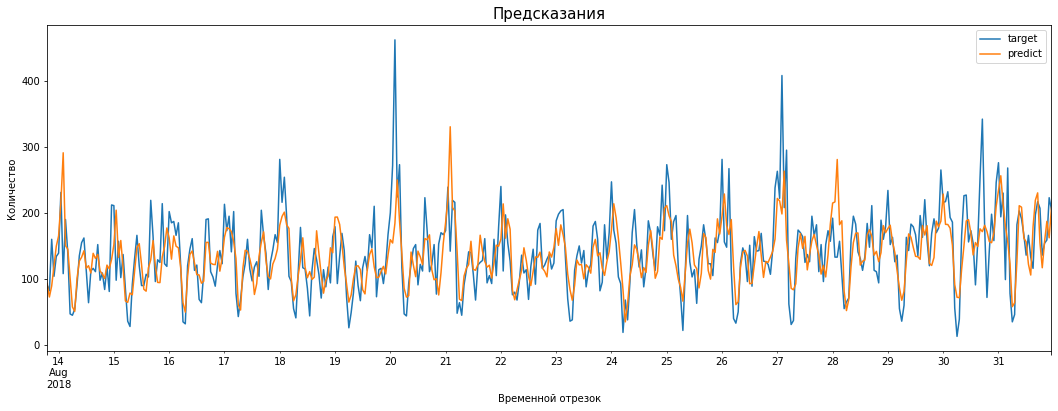

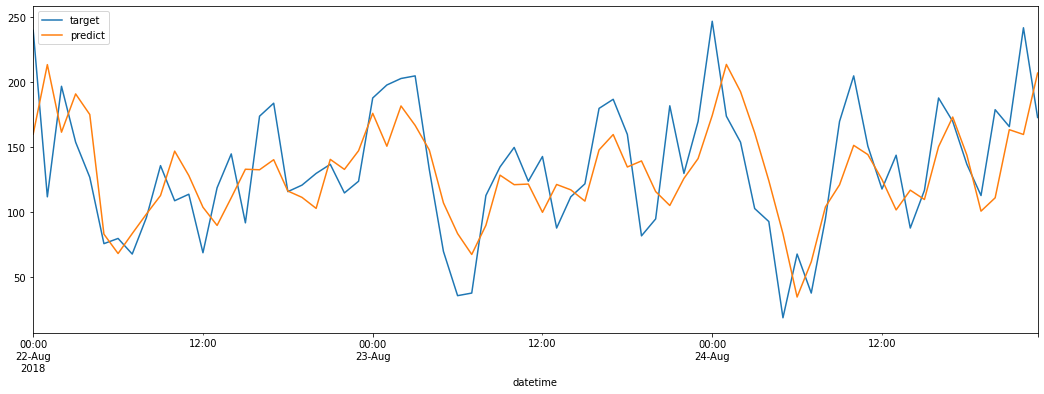

In [216]:


graphic(target_predict)


## Вывод

Проведено тестирование модели линейной регрессии, которой удалось достичь требуемого показателя метрики RMSE. Анализ сравнительного графика показал, что модель хуже всего справляется с предсказаниями на высоких пиках и на провалах, но в целом, угадывает направления движения. Показатель RMSE на тестовой выборке = 45.184.

<div class="alert alert-block alert-success">
<b>Успех:</b> Приятно видеть вывод в конце проекта!
</div>

:)